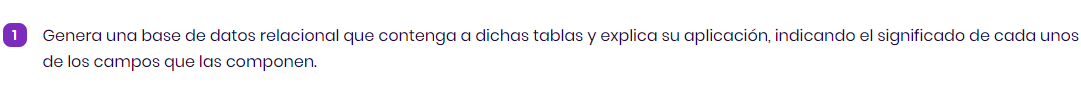

In [1]:
# importamos sqlite3 y creamos la conección a la BD Ventas y creamos la BD
import sqlite3
conn = sqlite3.connect('Ventas.db')

In [2]:
cur = conn.cursor()

In [3]:
# abrimos el archivo1 csv
import os
import csv

os.chdir('C:/Users/Isaac')
with open('Productos.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
data

[['IdProducto', 'NombreProducto', 'Precio', 'UnidadesVendidas', 'fechaventa'],
 ['10100', 'Formula Chocolate', '1870', '25', '01/01/2024'],
 ['10101', 'Proteina Vainilla', '1670', '35', '02/01/2024'],
 ['10102', 'Te manzana', '340', '17', '03/02/2024'],
 ['10103', 'Te Chai', '450', '22', '04/02/2024'],
 ['10104', 'Ponche Frutas', '570', '45', '05/03/2024'],
 ['10105', 'Colageno', '960', '29', '06/03/2024'],
 ['10106', 'Fibra', '700', '17', '07/03/2024'],
 ['10107', 'Calcio', '340', '32', '08/04/2024'],
 ['10108', 'Liftoff', '1300', '40', '09/04/2024'],
 ['10109', 'Aloe Mandarina', '610', '320', '10/04/2024'],
 ['10110', 'Aloe Mandarina', '610', '380', '11/05/2024'],
 ['10111', 'Aloe Uva', '610', '420', '12/05/2024'],
 ['10112', 'Aloe Uva', '610', '320', '13/06/2024'],
 ['10113', 'Formula Galleta', '1870', '86', '14/06/2024'],
 ['10114', 'Formula Galleta', '1870', '99', '15/07/2024'],
 ['10115', 'Fibra', '700', '65', '16/07/2024'],
 ['10116', 'Calcio', '340', '34', '17/07/2024'],
 ['101

In [5]:
len(data)

20

In [6]:
# creamos la Tabla Productos
cur.execute('''
    CREATE TABLE Productos(
     IdProducto INTEGER PRIMARY KEY,
     NombreProducto TEXTO,
     Precio INTEGER,
     UnidadesVendidas INTEGER,
     fechaventa DATE);
''')

In [8]:
# insertamos Datos en la Tabla Productos del archivo CSV

for renglon in range(1, len(data)):
    cur.execute(''' INSERT INTO Productos('IdProducto', 'NombreProducto', 'Precio', 'UnidadesVendidas', 'fechaventa')
                VALUEs (?,?,?,?,?)
    ''',data[renglon])

In [9]:
conn.commit()

In [10]:
# abrimos el archivo 2 csv
os.chdir('C:/Users/Isaac')
with open('Clientes.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [11]:
data

[['IdProducto', 'NombreCliente', 'Direccion'],
 ['10100', 'Carlos Ramirez', 'Calle 21 lote 10'],
 ['10101', 'Fernanda Ruiz', 'calle 22 lote 11'],
 ['10102', 'Rosa Torres', 'Calle 23 lote 12'],
 ['10103', 'Juan Mendoza', 'calle 24 lote 13'],
 ['10104', 'Jaime Robles', 'Calle 24 lote 14'],
 ['10105', 'Pedro Vargas', 'calle 26 lote 15'],
 ['10106', 'Pedro Infante', 'Calle 27 lote 13'],
 ['10107', 'Luis Miguel', 'calle 28 lote 14'],
 ['10108', 'Jaime Camil', 'Calle 29 lote 14'],
 ['10109', 'Teresa Mendoza', 'calle 30 lote 1'],
 ['10110', 'Gabriel Lopez', 'Calle 31 lote 2'],
 ['10111', 'Dulce Peres', 'calle 33 lote 4'],
 ['10112', 'Reyna Perez', 'Calle 34 lote 5'],
 ['10113', 'Jorge Ramirez', 'calle 50 lote 17'],
 ['10114', 'Diego Fuentes', 'Calle 39 lote 17'],
 ['10115', 'Laura Diaz', 'calle 22 lote 18'],
 ['10116', 'Susana Gomez', 'Calle 122 lote 18'],
 ['10117', 'Diana Reyes', 'calle 104 lote 19'],
 ['10118', 'Fabiola Vazquez', 'Calle 105 lote 19']]

In [12]:
len(data)

20

In [13]:
# creamos la Tabla Clientes
cur.execute('''
    CREATE TABLE Clientes(
     IdProducto INTEGER PRIMARY KEY,
     NombreCliente TEXTO,
     Direccion TEXTO);
''')

In [14]:
# insertamos Datos en la Tabla Clientes del archivo CSV

for renglon in range(1, len(data)):
    cur.execute(''' INSERT INTO Clientes('IdProducto', 'NombreCliente', 'Direccion')
                VALUEs (?,?,?)
    ''',data[renglon])

In [15]:
conn.commit()

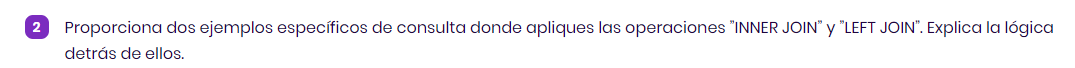

In [16]:
# Mostrar el nombre del cliente, nombre del producto y las unidades vendidas
cur.execute('''
    SELECT c.NombreCliente, p.NombreProducto, p.UnidadesVendidas
    FROM Productos AS p
    INNER JOIN Clientes AS c
    ON p.IdProducto = c.IdProducto
''') 
res = cur.fetchall()
res

[('Carlos Ramirez', 'Formula Chocolate', 25),
 ('Fernanda Ruiz', 'Proteina Vainilla', 35),
 ('Rosa Torres', 'Te manzana', 17),
 ('Juan Mendoza', 'Te Chai', 22),
 ('Jaime Robles', 'Ponche Frutas', 45),
 ('Pedro Vargas', 'Colageno', 29),
 ('Pedro Infante', 'Fibra', 17),
 ('Luis Miguel', 'Calcio', 32),
 ('Jaime Camil', 'Liftoff', 40),
 ('Teresa Mendoza', 'Aloe Mandarina', 320),
 ('Gabriel Lopez', 'Aloe Mandarina', 380),
 ('Dulce Peres', 'Aloe Uva', 420),
 ('Reyna Perez', 'Aloe Uva', 320),
 ('Jorge Ramirez', 'Formula Galleta', 86),
 ('Diego Fuentes', 'Formula Galleta', 99),
 ('Laura Diaz', 'Fibra', 65),
 ('Susana Gomez', 'Calcio', 34),
 ('Diana Reyes', 'Proteina Vainilla', 33),
 ('Fabiola Vazquez', 'Formula Fresa', 200)]

In [17]:
# LEFT JOIN
# Para cada producto en la tabla Productos, la consulta muestra el nombre del cliente que lo compró,
# su dirección, y la fecha en que se realizó la venta.

cur.execute('''
    SELECT p.NombreProducto, c.NombreCliente, c.Direccion, p.fechaventa
    FROM Productos AS p
    LEFT JOIN Clientes AS c
    ON p.IdProducto = c.IdProducto
''')
res = cur.fetchall()
res

[('Formula Chocolate', 'Carlos Ramirez', 'Calle 21 lote 10', '01/01/2024'),
 ('Proteina Vainilla', 'Fernanda Ruiz', 'calle 22 lote 11', '02/01/2024'),
 ('Te manzana', 'Rosa Torres', 'Calle 23 lote 12', '03/02/2024'),
 ('Te Chai', 'Juan Mendoza', 'calle 24 lote 13', '04/02/2024'),
 ('Ponche Frutas', 'Jaime Robles', 'Calle 24 lote 14', '05/03/2024'),
 ('Colageno', 'Pedro Vargas', 'calle 26 lote 15', '06/03/2024'),
 ('Fibra', 'Pedro Infante', 'Calle 27 lote 13', '07/03/2024'),
 ('Calcio', 'Luis Miguel', 'calle 28 lote 14', '08/04/2024'),
 ('Liftoff', 'Jaime Camil', 'Calle 29 lote 14', '09/04/2024'),
 ('Aloe Mandarina', 'Teresa Mendoza', 'calle 30 lote 1', '10/04/2024'),
 ('Aloe Mandarina', 'Gabriel Lopez', 'Calle 31 lote 2', '11/05/2024'),
 ('Aloe Uva', 'Dulce Peres', 'calle 33 lote 4', '12/05/2024'),
 ('Aloe Uva', 'Reyna Perez', 'Calle 34 lote 5', '13/06/2024'),
 ('Formula Galleta', 'Jorge Ramirez', 'calle 50 lote 17', '14/06/2024'),
 ('Formula Galleta', 'Diego Fuentes', 'Calle 39 lote 1

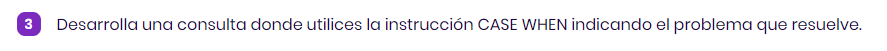

In [22]:
# Agrupar de acuerdo a la cantidad de unidades vendidas por producto y categorizar las ventas (bajo, aceptable, optimo)

cur.execute('''
    SELECT NombreProducto, UnidadesVendidas,
    CASE WHEN UnidadesVendidas < 20 THEN 'Nivel bajo de venta'
    WHEN UnidadesVendidas <= 50 THEN 'Nivel aceptable de venta'
    ELSE 'Nivel optimo de venta' END AS NivelVentas
    FROM Productos
    ORDER BY NivelVentas
''')
res = cur.fetchall()
res

[('Formula Chocolate', 25, 'Nivel aceptable de venta'),
 ('Proteina Vainilla', 35, 'Nivel aceptable de venta'),
 ('Te Chai', 22, 'Nivel aceptable de venta'),
 ('Ponche Frutas', 45, 'Nivel aceptable de venta'),
 ('Colageno', 29, 'Nivel aceptable de venta'),
 ('Calcio', 32, 'Nivel aceptable de venta'),
 ('Liftoff', 40, 'Nivel aceptable de venta'),
 ('Calcio', 34, 'Nivel aceptable de venta'),
 ('Proteina Vainilla', 33, 'Nivel aceptable de venta'),
 ('Te manzana', 17, 'Nivel bajo de venta'),
 ('Fibra', 17, 'Nivel bajo de venta'),
 ('Aloe Mandarina', 320, 'Nivel optimo de venta'),
 ('Aloe Mandarina', 380, 'Nivel optimo de venta'),
 ('Aloe Uva', 420, 'Nivel optimo de venta'),
 ('Aloe Uva', 320, 'Nivel optimo de venta'),
 ('Formula Galleta', 86, 'Nivel optimo de venta'),
 ('Formula Galleta', 99, 'Nivel optimo de venta'),
 ('Fibra', 65, 'Nivel optimo de venta'),
 ('Formula Fresa', 200, 'Nivel optimo de venta')]

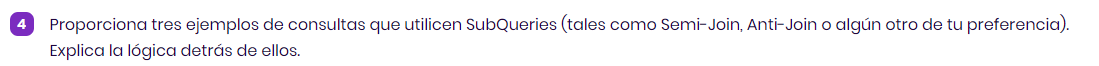

In [42]:
# Obtener IdProducto y Nombre del cliente  de la tabla 1 donde precios de la tabla 2 sea menores a 500
cur.execute('''
    SELECT IdProducto, NombreCliente
    FROM Clientes
    WHERE IdProducto IN
    (SELECT IdProducto
      FROM Productos
      WHERE Precio < 500)
''')
res = cur.fetchall()
res

[(10102, 'Rosa Torres'),
 (10103, 'Juan Mendoza'),
 (10107, 'Luis Miguel'),
 (10116, 'Susana Gomez')]

In [41]:
# Obtener IdProducto y Nombre del cliente  de la tabla 1 donde unidades vendidas de la tabla 2 sea menores a 30
cur.execute('''
    SELECT IdProducto, NombreCliente
    FROM Clientes
    WHERE IdProducto IN
        (SELECT IdProducto
         FROM Productos
         WHERE UnidadesVendidas < 30)
''')
res = cur.fetchall()
res

[(10100, 'Carlos Ramirez'),
 (10102, 'Rosa Torres'),
 (10103, 'Juan Mendoza'),
 (10105, 'Pedro Vargas'),
 (10106, 'Pedro Infante')]

In [45]:
# Subquery para seleccionar aquellos clientes cuyo Unidades Vendidas es mayor al promedio general
cur.execute('''
    SELECT c.IdProducto, c.NombreCliente
    FROM Clientes AS c
    WHERE c.IdProducto IN
      (SELECT p.IdProducto
       FROM Productos AS p
         WHERE p.UnidadesVendidas > 
           (SELECT AVG(UnidadesVendidas) 
            FROM Productos))
''')
res = cur.fetchall()
res

[(10109, 'Teresa Mendoza'),
 (10110, 'Gabriel Lopez'),
 (10111, 'Dulce Peres'),
 (10112, 'Reyna Perez'),
 (10118, 'Fabiola Vazquez')]